# [AI City Challenge 2019](https://www.aicitychallenge.org/2019-challenge-tracks/)


**Team Members** :  Avinash Kappa, Nitin Kumar, Pramod Geddam and Shubham

---

## Problem Statement

**Challenge Track 2 :  City-Scale Multi-Camera Vehicle Re-Identification**

Perform vehicle re-identification based on vehicle crops from multiple cameras placed at multiple intersections. This helps traffic engineers understand journey times along entire corridors.

---

## Dataset

Dataset : [Link](http://www.aicitychallenge.org/track2-download/)

The dataset contains 56,277 images, where 36,935 of them come from 333 object identities form the training set and 18,290 from the other 333 identities in the test set. An additional 1,052 images are used as queries. On average, each vehicle has 84.50 image signatures from 4.55 camera views.

Content in the directory:

1. "image_query/".  This dir contains 1052 images as queries. 
2. "image_test/".   This dir contains 18290 images for testing. 
3. "image_train/". This dir contains 36935 images for training. 
4. "name_query.txt". It lists all query file names.
5. "name_test.txt". It lists all test file names.
6. "name_train.txt". It lists all train file names.
7. "test_track.txt" & "test_track_id.txt". They record all testing tracks. Each track contrains multiple images of the same vehicle captured by one camera.
8. "train_track.txt" & "train_track_id.txt". They record all training tracks. Each track contrains multiple images of the same vehicle captured by one camera.
9. "train_label.xml". It lists the labels of vehicle ID and camera ID for training.
10. "train_label.csv". It lists the labels of vehicle ID in CSV format for training. 
11. "tool/visualize.py" & "tool/dist_example/". It is a Python tool for visualizing the results of vehicle re-identificaition, with an example of input data provided. 
12. "DataLicenseAgreement_AICityChallenge.pdf". The license agreement for the usage of this dataset.

---

## Evaluation Task


Find the image(s) in the test set that are from the same identity as the objects in each query image particularly, a list of the top 100 matches from the test set for each query image.


---



## Approach

We decided to solve this challenge using two approaches detailed below.


1) **Image Classifiers**

We are given 36935 training images where each image corresponds to one of the 333 classes. We will train an image classifier with ResNet50 as architecture using different pretrained models using fast.ai. Now we have two ways of training image classifier.

- **ImageNet pretrained model** : This is a straight forward approach of using ResNet50 model trained on ImageNet dataset as pretrained model for image classifier. This classifier will classify training images into 333 classes.(*Easy, no?*)
    
- **Stanford Cars pretrained model** : Here we will train a seperate ResNet50 model on [stanford cars dataset](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) which contains 16185 car images to be classified into 196 classes of cars. We will use the pretrained model trained on stanford cars dataset instead of ImageNet(as done in the above method) to classify the training images from Nvidia AI City Challenge into 333 classes.
  
 
After we train classifier we use the penultimate layer (Linear layer of size 512) to extract features of size 512 for each test and query image. As evaluation task demands us to find top 100 test images matching to each query image in ascending order of distance, we will find the distances using three methods:

- **KNeighbours** :  We use the [KNeighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) from sklearn library to fit all 512 features of 18290 test image for different values of k and use [kneighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors) function on each query image to obtain 100 neighbours (as we need top 100 test image).

-  **Annoy** : We use [Annoy](https://pypi.org/project/annoy/) library to find 100 nearest neighbours for each query image.

- **Euclidean Distance** :  This is the simplest approach to obtain the distance for each query image. We find the distance for each query image with all test image using `numpy.linalg.norm` to get top 100 test images in ascending order of distances.


2) **Siamese Networks**

We will use siamese network with triplet loss as baseline. 



---

## Experiments

As stanford cars dataset contains cars, we decided to use the model pretrained using stanford cars dataset, as our model for experiments.

### KNeighbours

We experiment with different values of k for fitting 18290 test features each of size 512.

- k = 333

- k = 100

- k = 10

We observe that k=333, k=100 and k=10 yield same results.

### Annoy

We experiment with different values of k for fitting 18290 test features each of size 512.

- k = 300

- k = 100

- k = 10

We observe that k=300 and k=100 yield same results and k=10 gives bad results than both.


### Eucledian

This gives same result as k=333.


### Submission

We made two submissions to Track 2 of AI City Challenge. One was with k=333 using KNeighbours and the other with k=300 using Annoy . Below are the results from the [evaluation server](https://eval.aicitychallenge.org) of Nvidia Challenge.


![sub0](row.png)
![sub1](submissions.png)


---


## Results


![sub1](results.png)



We **rank 71 among 84 teams** that participated in the Nvidia AI City challenge for track-2.

---

## Improvements and Next Steps

Rank 71, Good?

4 days from training to first submission on last day of challenge, well we tried and learned a lot!

Next Steps,

Classifier models gave good embeddings. By clustering the embeddings, we got top 100 matches for each query image from the test set. Our idea was to try the embeddings from a classification model and see if the obtained results can be used for Vehicle Re-Identification. Though we got decent results, as a next step we will be trying Siamese networks.

Siamese Network will yield impressive results as they are specifically designed to handle comparison of input images. Experiment with different loss functions like ArcFace, ArcMargin Loss, etc. Also, different batch sampling like Batch Hard (BH), Batch Sample (BS), Batch Weight(BW) and Batch All(BA).


--- 

## Reference Papers

1. [CityFlow: A City-Scale Benchmark for Multi-Target Multi-Camera Vehicle Tracking and Re-Identification](https://arxiv.org/pdf/1903.09254)

2. [Person Re-Identification in Identity Regression Space](https://arxiv.org/pdf/1806.09695.pdf)

3. [Attention Driven Person Re-identification](https://arxiv.org/pdf/1810.05866.pdf)



---

## Credits

Dataset for AI City Challenge : Nvidia

Dataset for Stanford Cars : Stanford

Fastai Library

---


**Note** : For pretrained model and training on stanford cars dataset, refer `Stanford_Cars_fastai.ipynb` notebook in same directory.

---




## Download and unzip AI City Challenge dataset


In [0]:
# Alternate way to connect google drive to colab

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# get all the pretrained models or data from drive

# training_data link
# https://drive.google.com/file/d/1dMUGGwYA0LYkd3eIqLvwDxLknivmFAG6/view

# export.pkl for nvidia model-2
# https://drive.google.com/open?id=1-CDlefAMLbC8jErXFwOLAjZ_0BFfb5km

# pretrained stanford cars model
# https://drive.google.com/open?id=1-6TCkrafwrJezoJ_P0zzYS8GW54OH-nl

In [0]:
# install pydrive to connect to google drive

! pip install pydrive

     |████████████████████████████████| 993kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#aicity training data

file_id = '1dMUGGwYA0LYkd3eIqLvwDxLknivmFAG6' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('challenge_data.zip')

In [0]:
# pretrained stanford cars model

file_id = '1-6TCkrafwrJezoJ_P0zzYS8GW54OH-nl' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('pretrained_resnet.pth')

In [0]:
# pretrained model trained on aicity dataset

file_id = '1-CDlefAMLbC8jErXFwOLAjZ_0BFfb5km' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('export.pkl')

In [0]:
!unzip 'challenge_data.zip'

We will copy necessary files into new `data` directory.

/content/data</br>
├── query</br>
│   ├── image_query&nbsp;&nbsp;             --> contains 1052 images </br>
│   └── name_query.txt&nbsp;&nbsp;             --> names of query images </br>
├── test</br>
│   ├── image_test &nbsp;&nbsp;            --> contains 18920 images</br>
│   ├── name_test.txt&nbsp;&nbsp;             --> names of test images </br>
│   ├── test_track_id.txt</br>
│   └── test_track.txt</br>
└── train</br>
    ├── image_train&nbsp;&nbsp;             --> contains 36952 images</br>
    ├── name_train.txt&nbsp;&nbsp;             --> names of train images </br>
    ├── train_label.csv</br>
    ├── train_label.xml</br>
    ├── train_track_id.txt</br>
    └── train_track.txt</br></br>

6 directories, 9 files

In [0]:
import os

os.mkdir('data/')
os.mkdir('data/train')
os.mkdir('data/test')
os.mkdir('data/query')

In [0]:
# copy necessary data to 'data/' folder

#copy train images and train text files
!cp -R /content/aic19-track2-reid/image_train /content/data/train
!cp /content/aic19-track2-reid/train_* /content/data/train
!cp /content/aic19-track2-reid/test_* /content/data/test
!cp /content/aic19-track2-reid/name_train.txt /content/data/train

#copy test images and test text files
!cp -R /content/aic19-track2-reid/image_test /content/data/test
!cp /content/aic19-track2-reid/name_test.txt /content/data/test

#copy query images and query text files
!cp -R /content/aic19-track2-reid/image_query /content/data/query
!cp /content/aic19-track2-reid/name_query.txt /content/data/query

In [0]:
!ls -lR /content/data/train/image_train/*.jpg | wc -l #number of train images
!ls -lR /content/data/test/image_test/*.jpg | wc -l  #number of test images
!ls -lR /content/data/query/image_query/*.jpg | wc -l #number of query images

36935
18290
1052


## EDA


We will look at the training data and how it relates to the labels. We will analyse the number of unique class ids which turns out to be 333.

In [0]:
from pathlib import Path
path = Path('/content/data')

In [0]:
#train_label.csv contains id and image name
import pandas as pd

colnames = ['id', 'img']
df = pd.read_csv(path/'train/train_label.csv', header=None, names=colnames)
df.head(10)

id         img
0  418  000001.jpg
1  381  000002.jpg
2  358  000003.jpg
3  353  000004.jpg
4   56  000005.jpg
5  375  000006.jpg
6   74  000007.jpg
7  351  000008.jpg
8  412  000009.jpg
9    5  000010.jpg

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 2 columns):
id     36935 non-null int64
img    36935 non-null object
dtypes: int64(1), object(1)
memory usage: 577.2+ KB


In [0]:
df.describe()

id
count  36935.000000
mean     314.028537
std      135.340205
min        1.000000
25%      265.000000
50%      359.000000
75%      405.000000
max      478.000000

In [0]:
# what are unique ids of cars and what is the number of unique cars?
df['id'].unique(), len(df['id'].unique())

(array([418, 381, 358, 353,  56, 375,  74, 351, 412,   5, 325, 346, 408,
        285, 341,   7, 277, 466,  59, 379, 333, 447, 365,  25, 391, 405,
        288,  27, 249, 440, 289, 402, 352, 415, 465,  37,  38, 443, 262,
         60, 477, 260, 372, 475, 470, 359, 403, 458, 425, 355, 459,  79,
        398,  26, 474, 396, 319, 384, 336, 376, 344, 340, 439,  15, 417,
         46, 343, 395,  76, 436, 323, 435, 382, 370, 457, 244,  61, 354,
        386, 446,  65, 367, 472, 437, 331, 364, 426, 392, 387, 345, 373,
        320, 254, 308, 380, 374, 377,  13,  68,  85, 250,  81,  29, 339,
        407, 279, 334, 287, 252, 242, 389, 348, 471, 369, 261, 324,   9,
        463, 315, 438, 337, 264, 263, 259,  57, 420, 302,  47, 311,  18,
         17,  70, 450, 456,  90, 448, 361, 281,   8,  19, 256, 468,  22,
        272, 349, 424, 350, 258, 241,   6, 473, 433, 414, 309, 356,  32,
        347, 423, 251, 328, 284, 400, 363, 378,  92, 431,  54, 362, 318,
        444, 476,  36, 429, 401,  33, 371, 330,  28

In [0]:
# convert the format which databunch from_csv in fastai requires 
# i.e. first column image and second column class ids
cols = ['img', 'id']
new_df = df[cols]

new_df.to_csv(path/'train/annots.csv', index=False)

In [0]:
! cat {path}/'train/train_track.txt'

In [0]:
!wc -l {path}/'train/train_track.txt'    # each row contains same class of image from different angle
!wc -l {path}/'train/train_track_id.txt'
!wc -l {path}/'train/name_train.txt'     # name of all image files

1897 /content/data/train/train_track.txt
1897 /content/data/train/train_track_id.txt
36935 /content/data/train/name_train.txt


## Visualize Training Data

Show me training data!

In [0]:
import matplotlib.pyplot as plt
import random
import imageio
%matplotlib inline

def show_images(img_path, path, rows=2, columns=4):
    fig=plt.figure(figsize=(18, 9))
    for i in range(1, columns*rows+1):
        img = imageio.imread(path/img_path[i-1])    
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.axis('off')

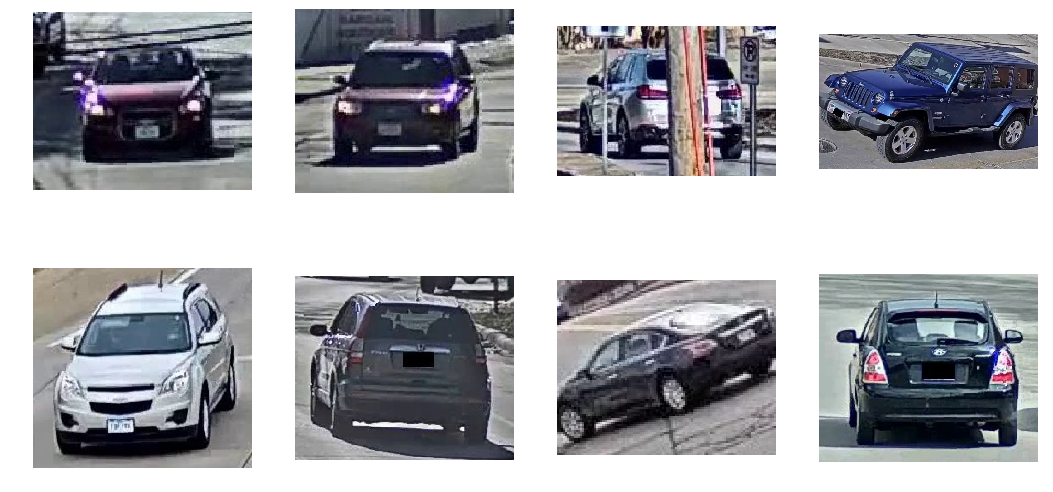

In [0]:
#randomly sample 8 images from train dataset

rnd_files = random.sample(list(df.img), 8)
train_path = path/'train/image_train'

show_images(rnd_files, train_path)

In [0]:
#pick any one row in train_track.txt such that all belongs to same class id
rnd_files = ['000210.jpg', '035980.jpg', '032963.jpg', '014363.jpg', '030231.jpg', '020381.jpg', '001886.jpg', '024801.jpg']

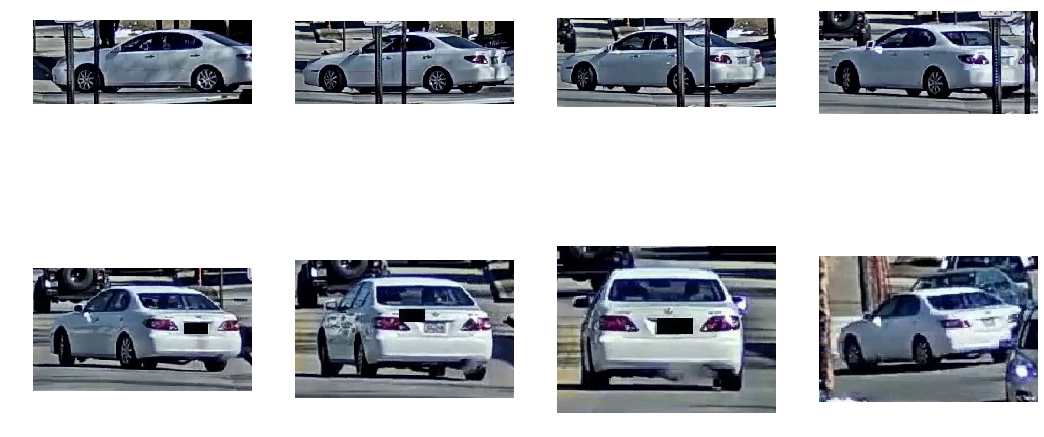

In [0]:
show_images(rnd_files, train_path)

## Fastai

In [0]:
# import required fastai libraries

from fastai.vision import *
import numpy as np
import os
from pathlib import Path

In [0]:
# path to dataset

path = Path('data/train').resolve()

In [0]:
# we will apply transformations such as lightining, zoom, changing brightness and
# changing contrast and resizing it to size 224 which is required for resnet50

tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

# batch size
bs = 64

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_csv(path, 'annots.csv', folder='image_train') #define source of input
       .split_by_rand_pct(0.2)                                      #ratio of split
       .label_from_df())                                            #grab the labels from name of df

In [0]:
# create databunch

data = (src.transform(tfms, size=224)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

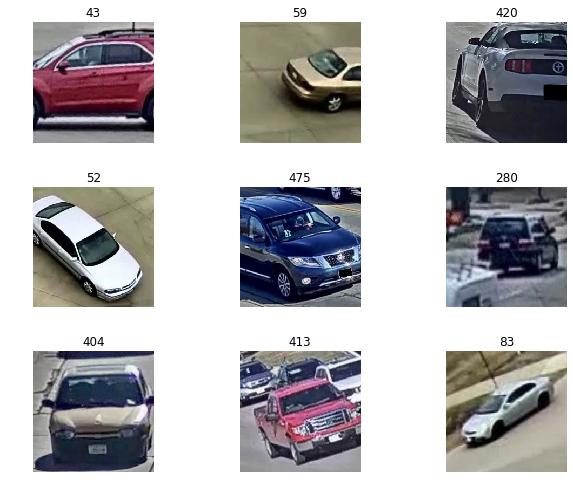

In [0]:
# show me sample images from dataset

data.show_batch(rows=3, figsize=(9, 7))

In [0]:
# print all the classes and number of classes

print(data.classes)
len(data.classes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366

333

### Pretrained Resnet50 model on ImageNet Dataset

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, pretrained=True, metrics=[error_rate, accuracy, top_k_accuracy])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


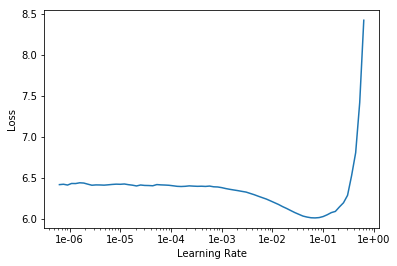

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 5 epochs

lr = 1e-2 
learn.fit_one_cycle(5, slice(lr))

In [0]:
# save the trained model if you don't wan't to redo everything again!

learn.save('/content/nvidia_ai_model_1_224_stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


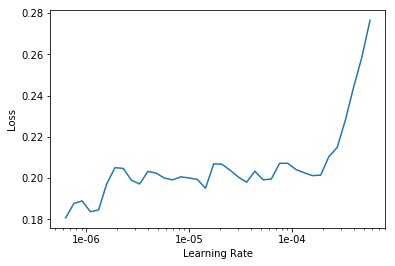

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs

learn.fit_one_cycle(4, slice(1e-5, lr/5))

In [0]:
# save the trained model if you don't wan't to redo everything again!

learn.save('/content/nvidia_ai_model_1_224_stage-2')

In [0]:
# create a backup by copying the saved model to google drive! 
# precaution is better than no caution!

%time !cp "/content/nvidia_ai_model_1_224_stage-2.pth" "/content/drive/My Drive/Colab Notebooks/nvidia_ai_model_1_224_stage-2.pth"

CPU times: user 142 ms, sys: 56.7 ms, total: 199 ms
Wall time: 15.2 s


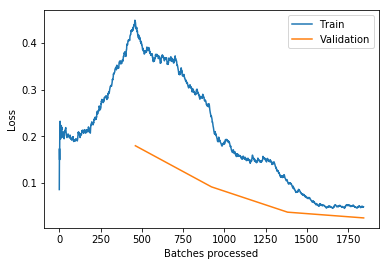

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
# fancy method in fastai to export all the classes and model architecture
# to file 'export.pkl'

learn.export()

In [0]:
# create a copy of that too!

%time !cp {path}"/export.pkl" "/content/drive/My Drive/Colab Notebooks/nvidia_ai_model_1_export.pkl"

CPU times: user 22 ms, sys: 44.2 ms, total: 66.2 ms
Wall time: 2.38 s


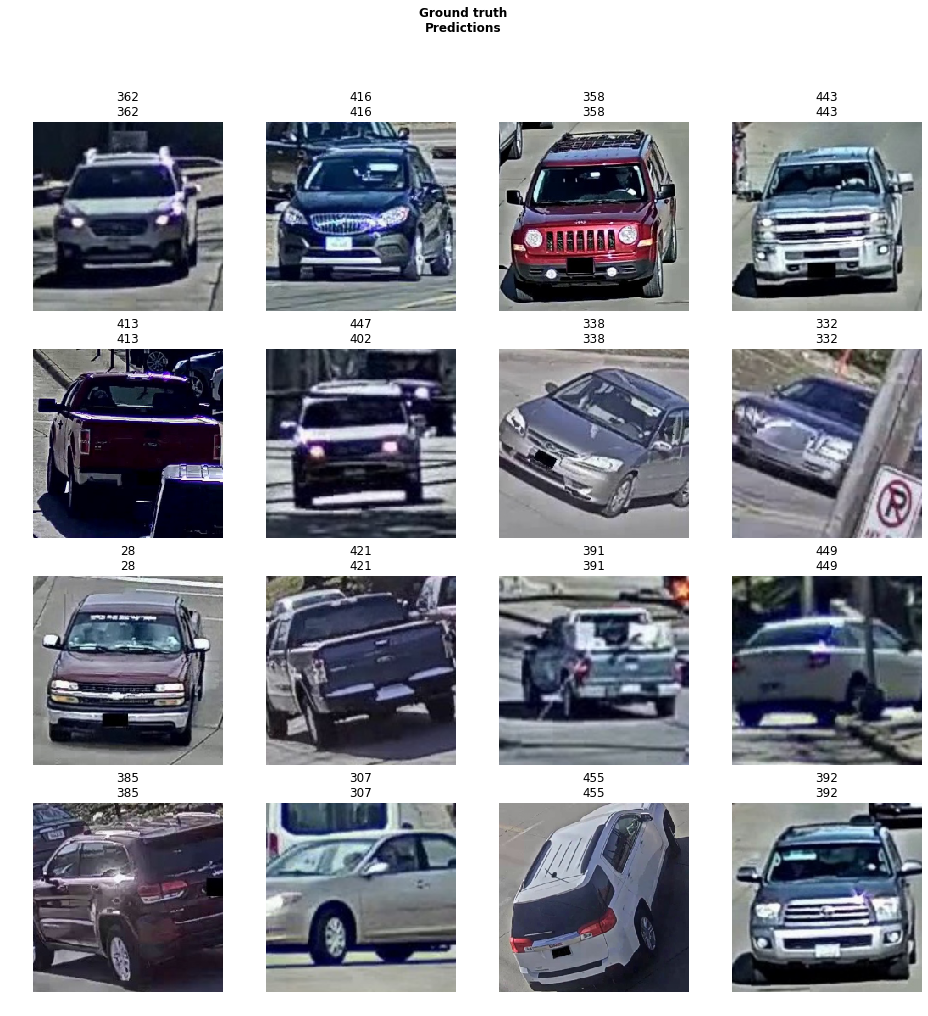

In [0]:
learn.show_results(rows=5)

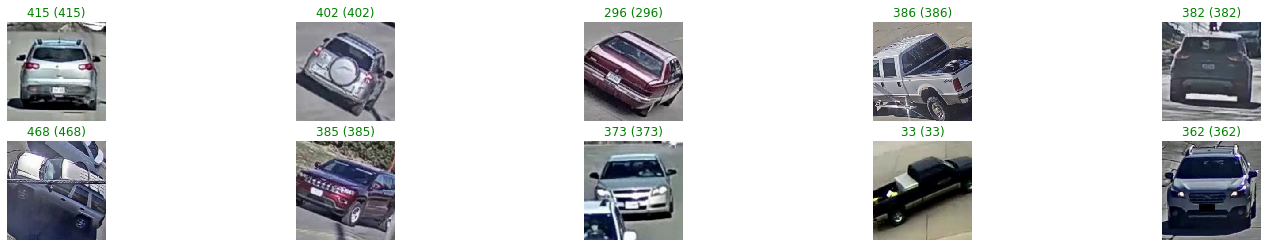

In [0]:
# classes
labels = learn.data.classes

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    img = data.valid_ds[idx+np.random.randint(0, len(data.valid_ds)-10)][0]
    preds = learn.predict(img)
    img.show(ax=ax)
    ax.set_title("{} ({})".format(str(learn.data.classes[preds[1]]), str(preds[0])),
                 color=("green" if str(learn.data.classes[preds[1]])==str(preds[0]) else "red"))

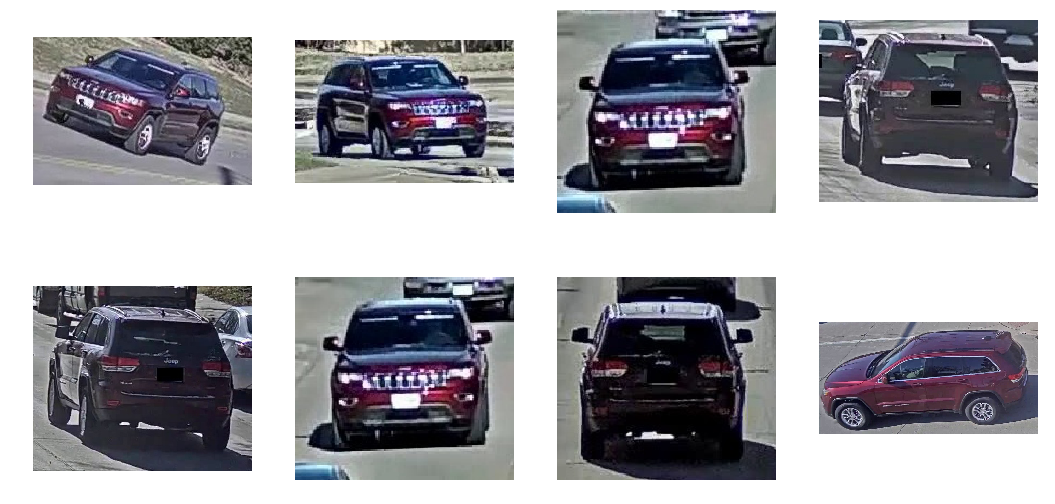

In [0]:
rnd_file = list(df.loc[df['id'] == 385]['img'][:8])
show_images(rnd_file, train_path)

### Pretrained Resnet50 model on Stanford Cars dataset

In [0]:
import torch

#load pretrained model
pre_trained_model = torch.load("pretrained_resnet.pth")

In [0]:
# Print model's state_dict
print("Model's state_dict:")
for k, param_tensor in pre_trained_model['model'].items():
    print(k, "\t", pre_trained_model['model'][k].size())

Model's state_dict:
0.0.weight 	 torch.Size([64, 3, 7, 7])
0.1.weight 	 torch.Size([64])
0.1.bias 	 torch.Size([64])
0.1.running_mean 	 torch.Size([64])
0.1.running_var 	 torch.Size([64])
0.1.num_batches_tracked 	 torch.Size([])
0.4.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
0.4.0.bn1.weight 	 torch.Size([64])
0.4.0.bn1.bias 	 torch.Size([64])
0.4.0.bn1.running_mean 	 torch.Size([64])
0.4.0.bn1.running_var 	 torch.Size([64])
0.4.0.bn1.num_batches_tracked 	 torch.Size([])
0.4.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
0.4.0.bn2.weight 	 torch.Size([64])
0.4.0.bn2.bias 	 torch.Size([64])
0.4.0.bn2.running_mean 	 torch.Size([64])
0.4.0.bn2.running_var 	 torch.Size([64])
0.4.0.bn2.num_batches_tracked 	 torch.Size([])
0.4.0.conv3.weight 	 torch.Size([256, 64, 1, 1])
0.4.0.bn3.weight 	 torch.Size([256])
0.4.0.bn3.bias 	 torch.Size([256])
0.4.0.bn3.running_mean 	 torch.Size([256])
0.4.0.bn3.running_var 	 torch.Size([256])
0.4.0.bn3.num_batches_tracked 	 torch.Size([])
0.4.0.downsample.0.wei

In [0]:
# delete last linear layer from pretrained stanford cars dataset
# so that there is no key mismatch error while loading weights

del pre_trained_model['model']['1.8.weight']
del pre_trained_model['model']['1.8.bias']

In [0]:
# new architecture after deleting last linear layer
for key, value in pre_trained_model['model'].items(): 
    print(key) 

0.0.weight
0.1.weight
0.1.bias
0.1.running_mean
0.1.running_var
0.1.num_batches_tracked
0.4.0.conv1.weight
0.4.0.bn1.weight
0.4.0.bn1.bias
0.4.0.bn1.running_mean
0.4.0.bn1.running_var
0.4.0.bn1.num_batches_tracked
0.4.0.conv2.weight
0.4.0.bn2.weight
0.4.0.bn2.bias
0.4.0.bn2.running_mean
0.4.0.bn2.running_var
0.4.0.bn2.num_batches_tracked
0.4.0.conv3.weight
0.4.0.bn3.weight
0.4.0.bn3.bias
0.4.0.bn3.running_mean
0.4.0.bn3.running_var
0.4.0.bn3.num_batches_tracked
0.4.0.downsample.0.weight
0.4.0.downsample.1.weight
0.4.0.downsample.1.bias
0.4.0.downsample.1.running_mean
0.4.0.downsample.1.running_var
0.4.0.downsample.1.num_batches_tracked
0.4.1.conv1.weight
0.4.1.bn1.weight
0.4.1.bn1.bias
0.4.1.bn1.running_mean
0.4.1.bn1.running_var
0.4.1.bn1.num_batches_tracked
0.4.1.conv2.weight
0.4.1.bn2.weight
0.4.1.bn2.bias
0.4.1.bn2.running_mean
0.4.1.bn2.running_var
0.4.1.bn2.num_batches_tracked
0.4.1.conv3.weight
0.4.1.bn3.weight
0.4.1.bn3.bias
0.4.1.bn3.running_mean
0.4.1.bn3.running_var
0.4.1.bn

In [0]:
# save new pretrained model
torch.save(pre_trained_model, '/content/new_pretrained_resnet.pth')

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy
# load pretrained model trained on stanford cars dataset
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy, top_k_accuracy]).load('/content/new_pretrained_resnet', strict=False)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


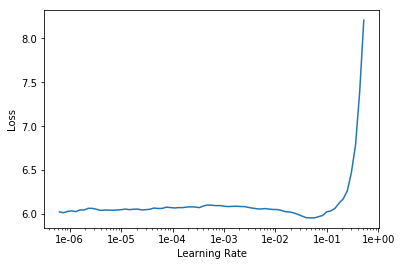

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 5 epochs

lr = 1e-2 
learn.fit_one_cycle(5, slice(lr))

In [0]:
# save the trained model if you don't wan't to redo everything again!

learn.save('/content/nvidia_ai_model_2_224_stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


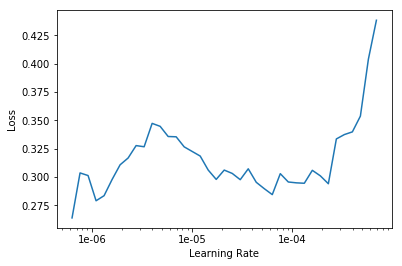

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs

learn.fit_one_cycle(4, slice(1e-5, lr/5))

In [0]:
# save the trained model if you don't wan't to redo everything again!

learn.save('/content/nvidia_ai_model_2_224_stage-2')

In [0]:
# create a backup by copying the saved model to google drive! 
# precaution is better than no caution!

%time !cp "/content/nvidia_ai_model_2_224_stage-2.pth" "/content/drive/My Drive/Colab Notebooks/nvidia_ai_model_2_224_stage-2.pth"

CPU times: user 113 ms, sys: 56.3 ms, total: 169 ms
Wall time: 15.2 s


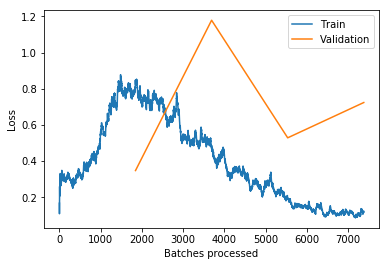

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
# fancy method in fastai to export all the classes and model architecture
# to file 'export.pkl'

learn.export()

In [0]:
# create a copy of that too!

%time !cp {path}"/export.pkl" "/content/drive/My Drive/Colab Notebooks/nvidia_ai_model_2_export.pkl"

CPU times: user 29.4 ms, sys: 47.8 ms, total: 77.2 ms
Wall time: 3.3 s


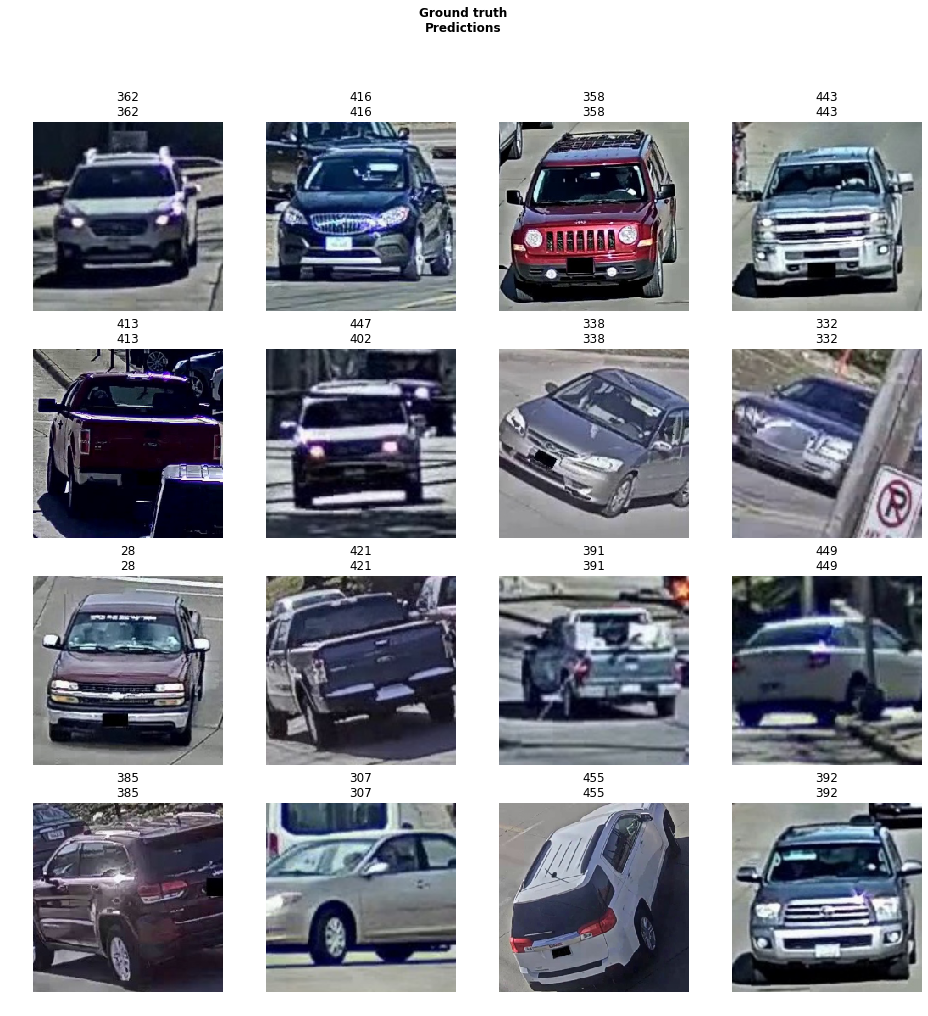

In [0]:
# pretty good results, ayyye!

learn.show_results(rows=5)

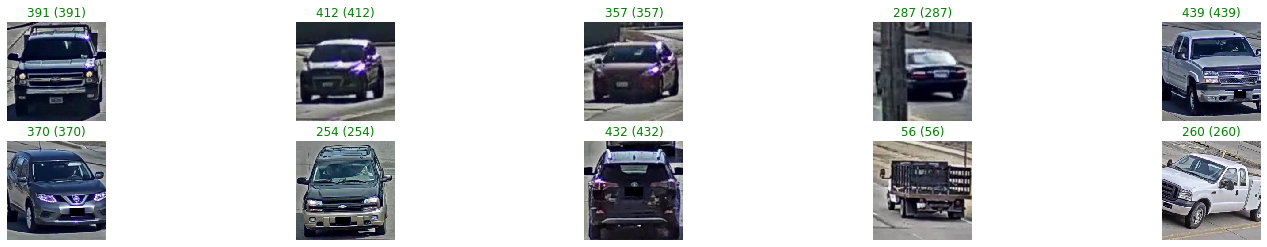

In [0]:
# classes
labels = learn.data.classes

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    img = data.valid_ds[idx+np.random.randint(0, len(data.valid_ds)-10)][0]
    preds = learn.predict(img)
    img.show(ax=ax)
    ax.set_title("{} ({})".format(str(learn.data.classes[preds[1]]), str(preds[0])),
                 color=("green" if str(learn.data.classes[preds[1]])==str(preds[0]) else "red"))

##  Inference

We will create file as required by submission format to submit the results to the challenge.

### Submission Format

One text file should be submitted containing, on each line, a list of the top 100 matches from the test set for each query object, in ascending order of their distance to the query. The delimiter is space. Each match should be represented as the ID of the test image, which is an integer between 1 and 18,290. An example submission is given below, where IDq,k denotes the test ID for the k’th match of the q’th query.

ID1,1 ID1,2 … ID1,100

ID2,1 ID2,2 … ID2,100

…

ID1052,1 ID1052,2 … ID1052,100

The text file containing all predictions should be named track2.txt and can be archived using Zip (track2.zip) or tar+gz (track2.tar.gz) to reduce upload time.

### Method - 1 

In [0]:
path = Path('/content/data')

In [0]:
# we will apply transformations such as lightining, zoom, changing brightness and
# changing contrast and resizing it to size 224 which is required for resnet50

tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

# batch size
bs = 64

#### Test Images

In [0]:
# lpad test images

src = (ImageList.from_csv(path, 'train/annots.csv', folder='train/image_train') #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_df()              #grab the labels from name of df
       .add_test_folder(test_folder='test/image_test')) # test images

In [0]:
# create databunch

data = (src.transform(tfms, size=224)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

In [0]:
# load the export.pkl which contains model

learn = load_learner('/content/')

In [0]:
learn.data.batch_size, len(data.test_ds)

(64, 18290)

In [0]:
m = learn.model.eval()

In [0]:
# get the output of penultimate layer
from fastai.callbacks.hooks import *

# Function to forward pass the image and fetching the penultimate layer using the fastai hooks
def get_activations(m, x):
    "Return activations of the penultimate layer after forward pass of an image through CNN"
    xb,_ = data.one_item(x)
    #xb_im = Image(data.denorm(xb)[0])
    xb = xb.cuda()
    with hook_output(m[1][4]) as hook_a: 
        preds = m(xb)
    acts  = hook_a.stored[0].cpu()
    return acts

In [0]:
# get activations for the sample image
x = data.train_ds[0][0]
v = get_activations(m, x)

v, v.size()

(tensor([  0.0000,  19.4141,   0.0000,  57.5151,  58.9631,  54.2725,  84.9305,
          43.0904,  38.7499,   0.0000,  64.1241,  71.1608,  56.0038,   0.0000,
           0.0000,  19.9318,   0.0000,   0.0000,   0.0000,   0.0000,  76.5094,
           0.0000, 134.4637,  14.5865,   0.0000,   0.0000, 150.3946,  49.2674,
           0.0000,   0.0000,  25.4542,   0.0000,  33.0415,  97.2043,   3.9402,
           0.0000,   0.0000,  21.1301,   0.0000,   0.0000,   1.6938, 100.1372,
          68.3179,   0.0000,   3.3702,   0.0000,  82.9578,  42.5491,   0.0000,
           0.0000,   7.2374,  31.8420,   0.0000,   0.0000,   0.0000,  22.3750,
           0.0000,  23.7637,  12.2238,   0.0000,   0.0000,   0.0000,  65.5877,
           3.3309,  50.5432,  78.7502,   2.9965,  21.4208,   0.0000,  98.0006,
           0.0000,   0.0000,   0.0000,  68.2620,  70.8829,   0.0000,   3.0245,
          22.4324,   0.0000, 102.0891, 120.3546,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,  87.3243,  87.8851,   0

In [0]:
learn.data.batch_size, len(data.test_ds)

(64, 18290)

In [0]:
classes = []
pred_score = []
from tqdm import tqdm

for i in tqdm(range(len(data.test_ds))):
    img = data.test_ds[i][0]
    l = learn.predict(img)
    classes.append(l[0])
    pred_score.append(float(l[2][l[1]]))

classes[:5], pred_score[:5]

100%|██████████| 18290/18290 [04:51<00:00, 62.80it/s]


([Category 383, Category 47, Category 433, Category 437, Category 398],
 [0.9274039268493652,
  0.4267510175704956,
  0.34354811906814575,
  0.46119850873947144,
  0.839674174785614])

In [0]:
feats = []

for i in tqdm(range(len(data.test_ds))):
    img = data.test_ds[i][0]
    feats.append(get_activations(m, img).numpy())
    
feats[:2]

100%|██████████| 18290/18290 [04:36<00:00, 66.19it/s]


[array([100.553246,  38.40209 ,   0.      ,  16.569143, ...,  53.555332,   0.      , 110.442024,  38.16639 ],
       dtype=float32),
 array([182.64993 ,   0.      ,   0.      ,  32.306908, ..., 125.939705,   0.      ,  35.81694 ,  62.933304],
       dtype=float32)]

In [0]:
paths = data.test_ds.x.items
paths[:5]

array([PosixPath('/content/data/test/image_test/013584.jpg'), PosixPath('/content/data/test/image_test/012187.jpg'),
       PosixPath('/content/data/test/image_test/012450.jpg'), PosixPath('/content/data/test/image_test/009010.jpg'),
       PosixPath('/content/data/test/image_test/004238.jpg')], dtype=object)

In [0]:
df = pd.DataFrame(columns=['path', 'pred_class_id', 'pred_score', 'features'])

In [0]:
len(paths), len(classes), len(pred_score), len(feats)

(18290, 18290, 18290, 18290)

In [0]:
df['path'] = paths
df['pred_class_id'] = classes
df['pred_score'] = pred_score
df['features'] = feats

In [0]:
df.head()

path pred_class_id  pred_score  \
0  /content/data/test/image_test/013584.jpg           383    0.927404   
1  /content/data/test/image_test/012187.jpg            47    0.426751   
2  /content/data/test/image_test/012450.jpg           433    0.343548   
3  /content/data/test/image_test/009010.jpg           437    0.461199   
4  /content/data/test/image_test/004238.jpg           398    0.839674   

                                            features  
0  [100.553246, 38.40209, 0.0, 16.569143, 48.3584...  
1  [182.64993, 0.0, 0.0, 32.306908, 90.56282, 41....  
2  [19.812553, 46.94835, 0.0, 25.779324, 166.6059...  
3  [38.548805, 65.85974, 0.0, 58.493645, 103.3955...  
4  [0.0, 0.0, 30.512718, 7.693765, 68.00566, 20.5...

In [0]:
df.to_csv(path/'feats_test.csv', index=False)

In [0]:
df_test = pd.read_csv(path/'feats_test.csv')
df_test.head()

path  pred_class_id  pred_score  \
0  /content/data/test/image_test/013584.jpg            383    0.927404   
1  /content/data/test/image_test/012187.jpg             47    0.426751   
2  /content/data/test/image_test/012450.jpg            433    0.343548   
3  /content/data/test/image_test/009010.jpg            437    0.461199   
4  /content/data/test/image_test/004238.jpg            398    0.839674   

                                            features  
0  [100.553246  38.40209    0.        16.569143 ....  
1  [182.64993    0.         0.        32.306908 ....  
2  [ 19.812553  46.94835    0.        25.779324 ....  
3  [ 38.548805  65.85974    0.        58.493645 ....  
4  [ 0.        0.       30.512718  7.693765 ...  ...

In [0]:
np.array(feats).shape

(18290, 512)

### KNearest Neighbours

In [0]:
from sklearn.neighbors import NearestNeighbors

X = np.array(feats)

neigh = NearestNeighbors(n_neighbors=333, radius=1.0, algorithm='auto', metric='euclidean', leaf_size=30, p=2)

neigh.fit(X)

#### Query Images

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_csv(path, 'train/annots.csv', folder='train/image_train') #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_df()           #grab the labels from name of df
       .add_test_folder(test_folder='query/image_query'))

In [0]:
# create databunch

data = (src.transform(tfms, size=224)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

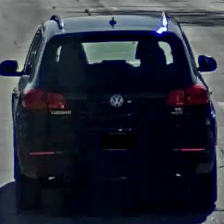

In [0]:
# test the results on sample query image

im = data.test_ds[15][0]
query_feats = get_activations(m, im)
im

In [0]:
# get distance and indices of top 100 neighbours for sample query image

distances, indices = neigh.kneighbors(query_feats.reshape(1, -1), n_neighbors=100)

distances, indices

(array([[533.015409, 545.010153, 547.54113 , 565.104037, ..., 854.716091, 855.02168 , 855.101571, 855.351518]]),
 array([[13151,  7537,  6907,  7202, ...,  8014,   628, 10963,  6230]]))

/content/data/test/image_test/011287.jpg


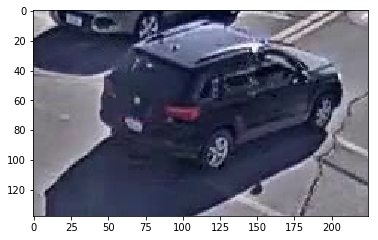

In [0]:
# how good are the results?
import imageio
k = df_test['path'].iloc[1750]
print (k)
img = imageio.imread(k)
plt.imshow(img)

In [0]:
distances = []
indices = []

for i in tqdm(range(len(data.test_ds))):
    
    img = data.test_ds[i][0]
    ftrs = get_activations(m, img)
    
    dist, ind = neigh.kneighbors(ftrs.reshape(1, -1), n_neighbors=100)
    
    distances.append(dist[0])
    indices.append(ind[0])

100%|██████████| 1052/1052 [00:39<00:00, 26.62it/s]


In [0]:
len(distances), len(indices)

(1052, 1052)

In [0]:
distances[:5], indices[:5]

([array([635.048089, 648.370316, 658.698129, 673.193944, ..., 779.339221, 780.237482, 780.413476, 780.819789]),
  array([735.344177, 746.127248, 755.648723, 768.189771, ..., 849.272682, 850.181307, 850.701286, 850.825158]),
  array([584.337898, 598.895981, 606.21824 , 619.508254, ..., 852.42632 , 852.836659, 852.937162, 852.987769]),
  array([705.953557, 710.04717 , 712.76628 , 723.736708, ..., 817.851248, 818.45694 , 818.534095, 820.015434]),
  array([670.266305, 683.893892, 685.493167, 686.362885, ..., 803.414185, 803.508867, 803.617933, 803.835275])],
 [array([10409,  2553,  1593,  9406, ..., 16678,  7388, 11580, 16136]),
  array([15261, 12254,  7374, 10166, ...,  7457,  4194,  6627, 16971]),
  array([14210, 10997, 14882,  7863, ...,  1921,  1976,  6293,  7546]),
  array([ 6356, 15110, 10683,  2446, ...,  8014, 14974,  8729,  6669]),
  array([ 9165,   257, 11532,  4223, ...,  8106, 11581,  7166,   845])])

In [0]:
p =[]
pths = []

for j in range(len(indices)):
    pth = []
    for k in range(100):
        p = df_test['path'].iloc[indices[j][k]].split('/')[-1]
        pth.append(p)
        
    pths.append(pth)

In [0]:
df_submission = pd.DataFrame(pths)

In [0]:
df_submission['path'] = data.test_ds.x.items

df_submission.head()

0           1           2           3           4           5  \
0  002102.jpg  004756.jpg  009597.jpg  009527.jpg  006843.jpg  003041.jpg   
1  014734.jpg  008993.jpg  000207.jpg  003654.jpg  003562.jpg  013061.jpg   
2  013063.jpg  001906.jpg  000166.jpg  003737.jpg  009499.jpg  008553.jpg   
3  007727.jpg  008229.jpg  001055.jpg  015371.jpg  018170.jpg  010629.jpg   
4  017403.jpg  016619.jpg  003297.jpg  009161.jpg  002399.jpg  001406.jpg   

            6           7           8           9  ...          91  \
0  001271.jpg  009214.jpg  006981.jpg  015015.jpg  ...  004099.jpg   
1  012006.jpg  009121.jpg  016611.jpg  013585.jpg  ...  005012.jpg   
2  009732.jpg  000364.jpg  010390.jpg  005968.jpg  ...  008172.jpg   
3  003290.jpg  006180.jpg  002438.jpg  012228.jpg  ...  006907.jpg   
4  004424.jpg  016335.jpg  016189.jpg  015564.jpg  ...  017113.jpg   

           92          93          94          95          96          97  \
0  009875.jpg  006444.jpg  002393.jpg  015666.jpg  005099.jpg  012870.jpg   
1  011708.jpg  003466.jpg  011133.jpg  004970.jpg  001249.jpg  013381.jpg   
2  003193.jpg  017945.jpg  008527.jpg  010102.jpg  009654.jpg  009565.jpg   
3  007795.jpg  003504.jpg  009538.jpg  005707.jpg  017897.jpg  010172.jpg   
4  003885.jpg  003643.jpg  005118.jpg  004077.jpg  016221.jpg  009741.jpg   

           98          99                                        path  
0  017422.jpg  009539.jpg  /content/data/query/image_query/000935.jpg  
1  013810.jpg  001026.jpg  /content/data/query/image_query/000077.jpg  
2  003643.jpg  000685.jpg  /content/data/query/image_query/000858.jpg  
3  000418.jpg  003969.jpg  /content/data/query/image_query/000452.jpg  
4  009193.jpg  001238.jpg  /content/data/query/image_query/000030.jpg  

[5 rows x 101 columns]

In [0]:
new_df = df_submission.sort_values(['path'])
new_df.head()

0           1           2           3           4           5  \
808   008589.jpg  003696.jpg  010356.jpg  017857.jpg  012072.jpg  014663.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  013419.jpg  017280.jpg  005131.jpg  015306.jpg   
74    000156.jpg  013603.jpg  003820.jpg  002643.jpg  004691.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

               6           7           8           9  ...          91  \
808   006834.jpg  011793.jpg  012941.jpg  012772.jpg  ...  017461.jpg   
656   001793.jpg  013362.jpg  015453.jpg  003576.jpg  ...  006670.jpg   
355   003811.jpg  001369.jpg  001162.jpg  001095.jpg  ...  006503.jpg   
74    000359.jpg  000084.jpg  010496.jpg  015573.jpg  ...  013740.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  006586.jpg   

              92          93          94          95          96          97  \
808   009596.jpg  014704.jpg  007571.jpg  009800.jpg  005800.jpg  002586.jpg   
656   004266.jpg  010630.jpg  005799.jpg  010026.jpg  016106.jpg  016600.jpg   
355   010054.jpg  003463.jpg  013270.jpg  002499.jpg  011400.jpg  012863.jpg   
74    004444.jpg  012218.jpg  009884.jpg  003932.jpg  012796.jpg  016131.jpg   
1038  018049.jpg  007710.jpg  008429.jpg  003740.jpg  001402.jpg  016853.jpg   

              98          99                                        path  
808   006876.jpg  010528.jpg  /content/data/query/image_query/000001.jpg  
656   004128.jpg  013614.jpg  /content/data/query/image_query/000002.jpg  
355   007785.jpg  008592.jpg  /content/data/query/image_query/000003.jpg  
74    008268.jpg  014029.jpg  /content/data/query/image_query/000004.jpg  
1038  017149.jpg  008128.jpg  /content/data/query/image_query/000005.jpg  

[5 rows x 101 columns]

In [0]:
new_df = new_df.drop(columns=['path'])
new_df.head()

0           1           2           3           4           5   \
808   008589.jpg  003696.jpg  010356.jpg  017857.jpg  012072.jpg  014663.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  013419.jpg  017280.jpg  005131.jpg  015306.jpg   
74    000156.jpg  013603.jpg  003820.jpg  002643.jpg  004691.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

              6           7           8           9   ...          90  \
808   006834.jpg  011793.jpg  012941.jpg  012772.jpg  ...  006515.jpg   
656   001793.jpg  013362.jpg  015453.jpg  003576.jpg  ...  009673.jpg   
355   003811.jpg  001369.jpg  001162.jpg  001095.jpg  ...  006203.jpg   
74    000359.jpg  000084.jpg  010496.jpg  015573.jpg  ...  003038.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  007369.jpg   

              91          92          93          94          95          96  \
808   017461.jpg  009596.jpg  014704.jpg  007571.jpg  009800.jpg  005800.jpg   
656   006670.jpg  004266.jpg  010630.jpg  005799.jpg  010026.jpg  016106.jpg   
355   006503.jpg  010054.jpg  003463.jpg  013270.jpg  002499.jpg  011400.jpg   
74    013740.jpg  004444.jpg  012218.jpg  009884.jpg  003932.jpg  012796.jpg   
1038  006586.jpg  018049.jpg  007710.jpg  008429.jpg  003740.jpg  001402.jpg   

              97          98          99  
808   002586.jpg  006876.jpg  010528.jpg  
656   016600.jpg  004128.jpg  013614.jpg  
355   012863.jpg  007785.jpg  008592.jpg  
74    016131.jpg  008268.jpg  014029.jpg  
1038  016853.jpg  017149.jpg  008128.jpg  

[5 rows x 100 columns]

In [0]:
df_submission.shape, new_df.shape

((1052, 101), (1052, 100))

In [0]:
new_df.to_csv('k_333_track_2_results.csv', index=False, header=False)

### Annoy (Approximate Nearest Neighbors Oh Yeah)

[Annoy](https://pypi.org/project/annoy/) is a C++ library with Python bindings to search for points in space that are close to a given query point. It also creates large read-only file-based data structures that are mmapped into memory so that many processes may share the same data.

In [0]:
!pip install annoy

In [0]:
from annoy import AnnoyIndex
from tqdm import tqdm

print (len(feats), len(feats[0]))

18290 512


In [0]:
print('Start creating annoy index')

# create index of the all the images (reduced space)
f = len(feats[0])
t = AnnoyIndex(f)

for i, x in tqdm(enumerate(feats)):
    t.add_item(i, x)

# build n_trees=100 trees. More number of trees means higher precision (requires higher RAM)
t.build(500)   

# save the index on the disk for reuse later
t.save('100-annoy-index.ann')

1545it [00:00, 15442.95it/s]

Start creating annoy index


18290it [00:01, 15752.74it/s]


True

In [0]:
# Load the saved annoy index
f = 512
annoy_index = AnnoyIndex(f)
annoy_index.load('100-annoy-index.ann') # super fast, will just mmap the file

True

In [0]:
# results for sample query image
annoy_index.get_nns_by_vector(query_feats, 100)

[13151,
 7537,
 6907,
 7202,
 14434,
 3607,
 9876,
 2063,
 13067,
 16346,
 7062,
 6292,
 3765,
 15751,
 5655,
 16172,
 12891,
 6461,
 14297,
 16081,
 1492,
 6647,
 17602,
 9274,
 2131,
 16294,
 493,
 13065,
 14759,
 1750,
 15529,
 16412,
 981,
 17480,
 5496,
 6955,
 4439,
 3975,
 628,
 7525,
 3575,
 8341,
 5876,
 4031,
 3177,
 12293,
 13473,
 11437,
 9464,
 14590,
 11041,
 134,
 3845,
 6710,
 12310,
 10585,
 1777,
 17023,
 12920,
 12866,
 4521,
 4488,
 18092,
 13161,
 17485,
 11298,
 745,
 11670,
 10048,
 8071,
 16390,
 2013,
 7002,
 12777,
 14413,
 11378,
 12318,
 5869,
 288,
 13057,
 1759,
 7190,
 4812,
 11025,
 11352,
 8059,
 12414,
 9351,
 5750,
 11326,
 8956,
 10963,
 13566,
 6999,
 6371,
 16548,
 13230,
 17077,
 15581,
 2465]

In [0]:
indices = []

for i in tqdm(range(len(data.test_ds))):
    
    img = data.test_ds[i][0]
    ftrs = get_activations(m, img)
    
    ind = annoy_index.get_nns_by_vector(ftrs, 100)
    
    indices.append(ind)

100%|██████████| 1052/1052 [00:31<00:00, 33.60it/s]


In [0]:
len(indices), len(indices[0])

(1052, 100)

In [0]:
p =[]
pths = []

for j in range(len(indices)):
    pth = []
    for k in range(100):
        p = df_test['path'].iloc[indices[j][k]].split('/')[-1]
        pth.append(p)
        
    pths.append(pth)

In [0]:
df_submission = pd.DataFrame(pths)

In [0]:
df_submission['path'] = data.test_ds.x.items

df_submission.head()

0           1           2           3           4           5  \
0  009597.jpg  004756.jpg  002102.jpg  009527.jpg  001271.jpg  012304.jpg   
1  001649.jpg  000868.jpg  013061.jpg  011650.jpg  003562.jpg  005797.jpg   
2  013063.jpg  001906.jpg  000166.jpg  003737.jpg  009499.jpg  008553.jpg   
3  003290.jpg  007727.jpg  006180.jpg  004314.jpg  008229.jpg  012402.jpg   
4  016189.jpg  012091.jpg  004249.jpg  017403.jpg  009509.jpg  006933.jpg   

            6           7           8           9  ...          91  \
0  003041.jpg  011613.jpg  010468.jpg  017930.jpg  ...  014554.jpg   
1  006734.jpg  010714.jpg  001821.jpg  009121.jpg  ...  009646.jpg   
2  000364.jpg  001278.jpg  009732.jpg  010390.jpg  ...  006162.jpg   
3  010629.jpg  001055.jpg  015371.jpg  018170.jpg  ...  009308.jpg   
4  016532.jpg  017320.jpg  008894.jpg  008403.jpg  ...  018245.jpg   

           92          93          94          95          96          97  \
0  009646.jpg  013223.jpg  015666.jpg  007246.jpg  004083.jpg  004343.jpg   
1  010483.jpg  014908.jpg  001047.jpg  007915.jpg  010402.jpg  006265.jpg   
2  005558.jpg  012819.jpg  008932.jpg  008272.jpg  007832.jpg  008527.jpg   
3  010154.jpg  005047.jpg  004665.jpg  000910.jpg  014427.jpg  016211.jpg   
4  018277.jpg  015198.jpg  015407.jpg  004787.jpg  010430.jpg  008837.jpg   

           98          99                                        path  
0  012140.jpg  000932.jpg  /content/data/query/image_query/000935.jpg  
1  003992.jpg  012540.jpg  /content/data/query/image_query/000077.jpg  
2  010494.jpg  012217.jpg  /content/data/query/image_query/000858.jpg  
3  008790.jpg  001533.jpg  /content/data/query/image_query/000452.jpg  
4  011312.jpg  001701.jpg  /content/data/query/image_query/000030.jpg  

[5 rows x 101 columns]

In [0]:
new_df = df_submission.sort_values(['path'])
new_df.head()

0           1           2           3           4           5  \
808   008589.jpg  010356.jpg  003696.jpg  006834.jpg  012072.jpg  017857.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  005131.jpg  013419.jpg  017280.jpg  001369.jpg   
74    000156.jpg  004691.jpg  013603.jpg  013685.jpg  003820.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

               6           7           8           9  ...          91  \
808   014663.jpg  011793.jpg  012941.jpg  009921.jpg  ...  008340.jpg   
656   013362.jpg  001793.jpg  003576.jpg  008941.jpg  ...  001982.jpg   
355   015306.jpg  003811.jpg  001162.jpg  001095.jpg  ...  012156.jpg   
74    002643.jpg  000359.jpg  006404.jpg  015154.jpg  ...  002846.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  010576.jpg   

              92          93          94          95          96          97  \
808   005903.jpg  002603.jpg  000405.jpg  011977.jpg  009800.jpg  009596.jpg   
656   006194.jpg  009673.jpg  017579.jpg  004266.jpg  010630.jpg  014977.jpg   
355   000364.jpg  003215.jpg  000788.jpg  014549.jpg  012863.jpg  002737.jpg   
74    005423.jpg  012846.jpg  011539.jpg  012218.jpg  004353.jpg  001956.jpg   
1038  007369.jpg  005668.jpg  004890.jpg  010770.jpg  015160.jpg  006668.jpg   

              98          99                                        path  
808   006639.jpg  005227.jpg  /content/data/query/image_query/000001.jpg  
656   009387.jpg  010026.jpg  /content/data/query/image_query/000002.jpg  
355   010378.jpg  014276.jpg  /content/data/query/image_query/000003.jpg  
74    001843.jpg  015795.jpg  /content/data/query/image_query/000004.jpg  
1038  001583.jpg  016853.jpg  /content/data/query/image_query/000005.jpg  

[5 rows x 101 columns]

In [0]:
new_df = new_df.drop(columns=['path'])
new_df.head()

0           1           2           3           4           5   \
808   008589.jpg  010356.jpg  003696.jpg  006834.jpg  012072.jpg  017857.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  005131.jpg  013419.jpg  017280.jpg  001369.jpg   
74    000156.jpg  004691.jpg  013603.jpg  013685.jpg  003820.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

              6           7           8           9   ...          90  \
808   014663.jpg  011793.jpg  012941.jpg  009921.jpg  ...  014725.jpg   
656   013362.jpg  001793.jpg  003576.jpg  008941.jpg  ...  017986.jpg   
355   015306.jpg  003811.jpg  001162.jpg  001095.jpg  ...  002125.jpg   
74    002643.jpg  000359.jpg  006404.jpg  015154.jpg  ...  008764.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  009084.jpg   

              91          92          93          94          95          96  \
808   008340.jpg  005903.jpg  002603.jpg  000405.jpg  011977.jpg  009800.jpg   
656   001982.jpg  006194.jpg  009673.jpg  017579.jpg  004266.jpg  010630.jpg   
355   012156.jpg  000364.jpg  003215.jpg  000788.jpg  014549.jpg  012863.jpg   
74    002846.jpg  005423.jpg  012846.jpg  011539.jpg  012218.jpg  004353.jpg   
1038  010576.jpg  007369.jpg  005668.jpg  004890.jpg  010770.jpg  015160.jpg   

              97          98          99  
808   009596.jpg  006639.jpg  005227.jpg  
656   014977.jpg  009387.jpg  010026.jpg  
355   002737.jpg  010378.jpg  014276.jpg  
74    001956.jpg  001843.jpg  015795.jpg  
1038  006668.jpg  001583.jpg  016853.jpg  

[5 rows x 100 columns]

In [0]:
df_submission.shape, new_df.shape

((1052, 101), (1052, 100))

In [0]:
new_df.to_csv('annoy_500_track_2_results.csv', index=False, header=False)

### Eucledian Distance

In [0]:
path = Path('/content/data')

In [0]:
# we will apply transformations such as lightining, zoom, changing brightness and
# changing contrast and resizing it to size 224 which is required for resnet50

tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

# batch size
bs = 64

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_csv(path, 'train/annots.csv', folder='train/image_train') #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_df()           #grab the labels from name of df
       .add_test_folder(test_folder='test/image_test'))

In [0]:
# create databunch

data = (src.transform(tfms, size=224)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

In [0]:
learn = load_learner('/content/')

In [0]:
learn.data.batch_size, len(data.test_ds)

(64, 18290)

In [0]:
m = learn.model.eval()

In [0]:

from fastai.callbacks.hooks import *

# Function to forward pass the image and fetching the penultimate layer using the fastai hooks
def get_activations(m, x):
    "Return activations of the penultimate layer after forward pass of an image through CNN"
    xb,_ = data.one_item(x)
    #xb_im = Image(data.denorm(xb)[0])
    xb = xb.cuda()
    with hook_output(m[1][4]) as hook_a: 
        preds = m(xb)
    acts  = hook_a.stored[0].cpu()
    return acts

In [0]:
# get activations for the image
x = data.train_ds[0][0]
v = get_activations(m, x)

v, v.size()

(tensor([0.0000e+00, 1.5071e+01, 1.0878e+01, 2.2033e+01, 5.6524e+01, 0.0000e+00,
         1.1198e+02, 0.0000e+00, 7.9734e+01, 1.6133e+01, 0.0000e+00, 1.1696e+02,
         0.0000e+00, 0.0000e+00, 8.8593e+01, 5.4356e+01, 0.0000e+00, 0.0000e+00,
         1.3186e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.5836e+00, 0.0000e+00,
         2.3572e+01, 1.9919e+01, 6.5070e+01, 5.8988e+01, 0.0000e+00, 1.1376e+01,
         7.1783e+01, 2.1507e+01, 1.4620e+02, 9.8339e+01, 2.6762e+01, 2.5235e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1096e+01,
         0.0000e+00, 0.0000e+00, 6.8598e+01, 1.0208e+02, 0.0000e+00, 9.5360e+01,
         0.0000e+00, 9.1681e+01, 1.2736e+02, 1.5506e+01, 0.0000e+00, 1.1643e+02,
         3.6879e+00, 0.0000e+00, 0.0000e+00, 2.2441e+01, 6.8628e+00, 0.0000e+00,
         6.1118e+00, 0.0000e+00, 1.0722e+02, 9.7157e+01, 0.0000e+00, 0.0000e+00,
         1.9276e+01, 8.8464e+00, 7.3123e+01, 0.0000e+00, 3.5585e+00, 2.9340e+01,
         4.2549e+01, 6.4960e

In [0]:
learn.data.batch_size, len(data.test_ds)

(64, 18290)

In [0]:
from tqdm import tqdm

feats = []

for i in tqdm(range(len(data.test_ds))):
    img = data.test_ds[i][0]
    feats.append(get_activations(m, img).numpy())
    
feats[:2]

100%|██████████| 18290/18290 [04:31<00:00, 67.46it/s]


[array([100.553246,  38.40209 ,   0.      ,  16.569143, ...,  53.555332,   0.      , 110.442024,  38.16639 ],
       dtype=float32),
 array([182.64993 ,   0.      ,   0.      ,  32.306908, ..., 125.939705,   0.      ,  35.81694 ,  62.933304],
       dtype=float32)]

In [0]:
paths = data.test_ds.x.items
paths[:5]

array([PosixPath('/content/data/test/image_test/013584.jpg'), PosixPath('/content/data/test/image_test/012187.jpg'),
       PosixPath('/content/data/test/image_test/012450.jpg'), PosixPath('/content/data/test/image_test/009010.jpg'),
       PosixPath('/content/data/test/image_test/004238.jpg')], dtype=object)

In [0]:
df_test = pd.DataFrame(columns=['path', 'features'])

In [0]:
df_test['path'] = paths
df_test['features'] = feats

In [0]:
df_test.head()

path  \
0  /content/data/test/image_test/013584.jpg   
1  /content/data/test/image_test/012187.jpg   
2  /content/data/test/image_test/012450.jpg   
3  /content/data/test/image_test/009010.jpg   
4  /content/data/test/image_test/004238.jpg   

                                            features  
0  [100.553246, 38.40209, 0.0, 16.569143, 48.3584...  
1  [182.64993, 0.0, 0.0, 32.306908, 90.56282, 41....  
2  [19.812553, 46.94835, 0.0, 25.779324, 166.6059...  
3  [38.548805, 65.85974, 0.0, 58.493645, 103.3955...  
4  [0.0, 0.0, 30.512718, 7.693765, 68.00566, 20.5...

In [0]:
df_test.to_csv('test_feats.csv', index=False)

In [0]:
import pandas as pd


df_test = pd.read_csv('test_feats.csv')
df_test.head()

path  \
0  /content/data/test/image_test/013584.jpg   
1  /content/data/test/image_test/012187.jpg   
2  /content/data/test/image_test/012450.jpg   
3  /content/data/test/image_test/009010.jpg   
4  /content/data/test/image_test/004238.jpg   

                                            features  
0  [100.553246  38.40209    0.        16.569143 ....  
1  [182.64993    0.         0.        32.306908 ....  
2  [ 19.812553  46.94835    0.        25.779324 ....  
3  [ 38.548805  65.85974    0.        58.493645 ....  
4  [ 0.        0.       30.512718  7.693765 ...  ...

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_csv(path, 'train/annots.csv', folder='train/image_train') #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_df()           #grab the labels from name of df
       .add_test_folder(test_folder='query/image_query'))

In [0]:
# create databunch

data = (src.transform(tfms, size=224)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

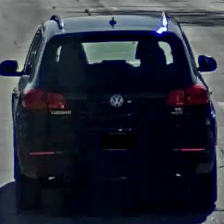

In [0]:
im = data.test_ds[15][0]
query_feats = get_activations(m, im)
im

In [0]:
print (query_feats.shape)

torch.Size([512])


In [0]:
from tqdm import tqdm

query_feats = []

for i in tqdm(range(len(data.test_ds))):
    img = data.test_ds[i][0]
    query_feats.append(get_activations(m, img).numpy())
    
query_feats[:2]

100%|██████████| 1052/1052 [00:17<00:00, 59.05it/s]


[array([ 0.      , 31.022457,  6.383252, 17.554258, ..., 27.255266, 46.30074 , 29.274097, 52.729546], dtype=float32),
 array([32.313503,  0.      ,  0.      , 35.202896, ..., 95.348656, 63.518627, 20.248102, 68.28974 ], dtype=float32)]

In [0]:
import time
import numpy as np

indices = []
start = time.time()

for i in range(len(query_feats)):
    dist = []
    
    for j in range(len(feats)):
        dist.append(np.linalg.norm(np.array(query_feats[i])-np.array(feats[j])))
    
    indices.append(np.argsort(dist)[:100])
    
end = time.time()    
print ('Total time taken', end-start, 'seconds')

Total time taken 137.38497710227966 seconds


In [0]:
len(indices), len(indices[0])

(1052, 100)

In [0]:
p =[]
pths = []

for j in range(len(indices)):
    pth = []
    for k in range(100):
        p = df_test['path'].iloc[indices[j][k]].split('/')[-1]
        pth.append(p)
        
    pths.append(pth)

In [0]:
df_submission = pd.DataFrame(pths)

In [0]:
df_submission['path'] = data.test_ds.x.items

df_submission.head()

0           1           2           3           4           5  \
0  002102.jpg  004756.jpg  009597.jpg  009527.jpg  006843.jpg  003041.jpg   
1  014734.jpg  008993.jpg  000207.jpg  003654.jpg  003562.jpg  013061.jpg   
2  013063.jpg  001906.jpg  000166.jpg  003737.jpg  009499.jpg  008553.jpg   
3  007727.jpg  008229.jpg  001055.jpg  015371.jpg  018170.jpg  010629.jpg   
4  017403.jpg  016619.jpg  003297.jpg  009161.jpg  002399.jpg  001406.jpg   

            6           7           8           9  ...          91  \
0  001271.jpg  009214.jpg  006981.jpg  015015.jpg  ...  004099.jpg   
1  012006.jpg  009121.jpg  016611.jpg  013585.jpg  ...  005012.jpg   
2  009732.jpg  000364.jpg  010390.jpg  005968.jpg  ...  008172.jpg   
3  003290.jpg  006180.jpg  002438.jpg  012228.jpg  ...  006907.jpg   
4  004424.jpg  016335.jpg  016189.jpg  015564.jpg  ...  017113.jpg   

           92          93          94          95          96          97  \
0  009875.jpg  006444.jpg  002393.jpg  015666.jpg  005099.jpg  012870.jpg   
1  011708.jpg  003466.jpg  011133.jpg  004970.jpg  001249.jpg  013381.jpg   
2  003193.jpg  017945.jpg  008527.jpg  010102.jpg  009654.jpg  009565.jpg   
3  007795.jpg  003504.jpg  009538.jpg  005707.jpg  017897.jpg  010172.jpg   
4  003885.jpg  003643.jpg  005118.jpg  004077.jpg  016221.jpg  009741.jpg   

           98          99                                        path  
0  017422.jpg  009539.jpg  /content/data/query/image_query/000935.jpg  
1  013810.jpg  001026.jpg  /content/data/query/image_query/000077.jpg  
2  003643.jpg  000685.jpg  /content/data/query/image_query/000858.jpg  
3  000418.jpg  003969.jpg  /content/data/query/image_query/000452.jpg  
4  009193.jpg  001238.jpg  /content/data/query/image_query/000030.jpg  

[5 rows x 101 columns]

In [0]:
new_df = df_submission.sort_values(['path'])
new_df.head()

0           1           2           3           4           5  \
808   008589.jpg  003696.jpg  010356.jpg  017857.jpg  012072.jpg  014663.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  013419.jpg  017280.jpg  005131.jpg  015306.jpg   
74    000156.jpg  013603.jpg  003820.jpg  002643.jpg  004691.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

               6           7           8           9  ...          91  \
808   006834.jpg  011793.jpg  012941.jpg  012772.jpg  ...  017461.jpg   
656   001793.jpg  013362.jpg  015453.jpg  003576.jpg  ...  006670.jpg   
355   003811.jpg  001369.jpg  001162.jpg  001095.jpg  ...  006503.jpg   
74    000359.jpg  000084.jpg  010496.jpg  015573.jpg  ...  013740.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  006586.jpg   

              92          93          94          95          96          97  \
808   009596.jpg  014704.jpg  007571.jpg  009800.jpg  005800.jpg  002586.jpg   
656   004266.jpg  010630.jpg  005799.jpg  010026.jpg  016106.jpg  016600.jpg   
355   010054.jpg  003463.jpg  013270.jpg  002499.jpg  011400.jpg  012863.jpg   
74    004444.jpg  012218.jpg  009884.jpg  003932.jpg  012796.jpg  016131.jpg   
1038  018049.jpg  007710.jpg  008429.jpg  003740.jpg  001402.jpg  016853.jpg   

              98          99                                        path  
808   006876.jpg  010528.jpg  /content/data/query/image_query/000001.jpg  
656   004128.jpg  013614.jpg  /content/data/query/image_query/000002.jpg  
355   007785.jpg  008592.jpg  /content/data/query/image_query/000003.jpg  
74    008268.jpg  014029.jpg  /content/data/query/image_query/000004.jpg  
1038  017149.jpg  008128.jpg  /content/data/query/image_query/000005.jpg  

[5 rows x 101 columns]

In [0]:
new_df = new_df.drop(columns=['path'])
new_df.head()

0           1           2           3           4           5   \
808   008589.jpg  003696.jpg  010356.jpg  017857.jpg  012072.jpg  014663.jpg   
656   008746.jpg  000850.jpg  004349.jpg  013550.jpg  016222.jpg  015190.jpg   
355   017204.jpg  001485.jpg  013419.jpg  017280.jpg  005131.jpg  015306.jpg   
74    000156.jpg  013603.jpg  003820.jpg  002643.jpg  004691.jpg  012509.jpg   
1038  011229.jpg  016978.jpg  008938.jpg  001774.jpg  018261.jpg  008168.jpg   

              6           7           8           9   ...          90  \
808   006834.jpg  011793.jpg  012941.jpg  012772.jpg  ...  006515.jpg   
656   001793.jpg  013362.jpg  015453.jpg  003576.jpg  ...  009673.jpg   
355   003811.jpg  001369.jpg  001162.jpg  001095.jpg  ...  006203.jpg   
74    000359.jpg  000084.jpg  010496.jpg  015573.jpg  ...  003038.jpg   
1038  009744.jpg  004195.jpg  010488.jpg  016565.jpg  ...  007369.jpg   

              91          92          93          94          95          96  \
808   017461.jpg  009596.jpg  014704.jpg  007571.jpg  009800.jpg  005800.jpg   
656   006670.jpg  004266.jpg  010630.jpg  005799.jpg  010026.jpg  016106.jpg   
355   006503.jpg  010054.jpg  003463.jpg  013270.jpg  002499.jpg  011400.jpg   
74    013740.jpg  004444.jpg  012218.jpg  009884.jpg  003932.jpg  012796.jpg   
1038  006586.jpg  018049.jpg  007710.jpg  008429.jpg  003740.jpg  001402.jpg   

              97          98          99  
808   002586.jpg  006876.jpg  010528.jpg  
656   016600.jpg  004128.jpg  013614.jpg  
355   012863.jpg  007785.jpg  008592.jpg  
74    016131.jpg  008268.jpg  014029.jpg  
1038  016853.jpg  017149.jpg  008128.jpg  

[5 rows x 100 columns]

In [0]:
df_submission.shape, new_df.shape

((1052, 101), (1052, 100))

In [0]:
new_df.to_csv('dist_track_2_results.csv', index=False, header=False)